In [1]:
dir = dirname(pwd()) * "/PROJECT"
include(dir * "/functions/Preamble.jl")
dir = dirname(pwd()) * "/PROJECT"

t0 = now()

  Activating project at `C:\Users\conno\Documents\CAMBRIDGE\Part III\Comp Project\JULIA\PROJECT`

Num threads: 4

2023-05-15T15:51:49.546

In [2]:
include(dir * "/functions/DataStructure.jl")
include(dir * "/functions/Bases.jl")
include(dir * "/functions/Plotting.jl")
include(dir * "/functions/Statistics.jl")
include(dir * "/functions/Simulation.jl")
include(dir * "/functions/SingleVertexApproxns.jl")

include(dir * "/functions/simulationFunctions/GroundStates.jl")

## Setup

In [3]:
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 20
rcParams["font.family"] = "Times New Roman"
PyPlot.matplotlib[:rc]("mathtext",fontset="stix")
PyPlot.matplotlib[:rc]("font",family="STIXGeneral",style="normal",size=18)

font = "Times New Roman"
fontsize = 20

20

## Demon

In [4]:
filefun = (method) ->  dir * "/data/" * method * ".jld";

method = "MicroDiff"
file = filefun(method);

In [5]:
load(file)

Dict{String, Any} with 20 entries:
  "Temperature"        => [0.01, 0.213878, 0.417755, 0.621633, 0.82551, 1.02939…
  "NumFlippedEdges"    => Any[]
  "twoFlip"            => true
  "C"                  => [NaN NaN … 0.0169582 0.0169533; NaN NaN … 5.81089e-9 …
  "alpha"              => [NaN NaN … 0.945648 0.951079; NaN NaN … 0.00116987 0.…
  "VACF"               => [NaN NaN … 0.441328 0.44444; NaN NaN … -0.0327174 -0.…
  "num_histories"      => 100
  "D"                  => [NaN NaN … 0.0885363 0.087848; NaN NaN … 0.000442093 …
  "basis"              => (Cell[Cell(false, 0.0, [0.0, 0.0], UInt32[], UInt32[0…
  "tau"                => 2:100
  "Size"               => [16, 16]
  "EnergyQuantisation" => 4
  "runtime"            => 1000
  "Dself"              => 1.0
  "gamma"              => [NaN NaN … -1.29915 -1.3031; NaN NaN … 2.81764e-5 2.7…
  "Fields"             => 0.0:0.16666666666666666:1.0
  "MSD"                => [NaN NaN … 0.0 0.0; NaN NaN … 0.441328 0.44444; … ; N…
  "lambda"    

In [6]:
λ = load(file, "lambda")
ξ = load(file, "xi")
twoFlip = load(file, "twoFlip")
isSpinIce = (λ==0 && ξ==1)
δE = (λ==0) ? 8*ξ : 4*λ

4.0

In [7]:
z = Coordination(load(file, "basis"))
Dself = load(file, "Dself")

1.0

In [8]:
if twoFlip
    Kfun = (T, h) -> Dself ./ 2 .* (0.5 .* δE ./ T).^2 .* ExcitationDensity(T, h, z) .* (1 .- AllExcitationDensity(T, h, z)) .* (1 .- Magnetisation(T, h, z)) ./ 2 # additional magnetisation factor for +-+- bond percolation
else
    Kfun = (T, h) -> Dself ./ 2 .* (0.5 .* δE ./ T).^2 .* ExcitationDensity(T, h, z) .* (1 .- AllExcitationDensity(T, h, z))
end

Cfun = (T, h) -> 2/z .* (λ^2 .* sech.(λ ./T).^2 + 2 * h^2 .* sech.(h ./T).^2) ./ T.^2

if twoFlip
    Dfun = (T, h) -> Kfun(T, h) ./ Cfun(T, h)
else
    Dfun = (T, h) -> Kfun(T, h) ./ HeatCapacity(T, h, z)
end

#68 (generic function with 1 method)

In [9]:
𝒽 = load(file, "Fields");
colors = jetmap(length(𝒽));

In [10]:
if method == "DemonKubo" 
    Tobs = load(file, "ObservedTemperature");
    TobsStd = load(file, "ObservedTemperatureStd");
    T = load(file, "TargetTemperature");

    figure()
    for i in eachindex(𝒽)
        plotWithError(Tobs[:,i], T, colors[i], ".", TobsStd[:,i])
    end
    xlim([0,10.1])
    ylim([0,10.1])
    savefig("figs/Demon_Kubo_Temperature.png")
    # Just to check that out temperature estimates aren't too far off
else
    Tobs = load(file, "Temperature");
    Tobs = reshape(Tobs, size(Tobs)..., 1)
    TobsStd = zeros(size(Tobs));
end;

# Comparing two methods

In [11]:
file = filefun("DemonKubo")

λ = load(file, "lambda")
ξ = load(file, "xi")
twoFlip = load(file, "twoFlip")
isSpinIce = (λ==0 && ξ==1)
δE = (λ==0) ? 8*ξ : 4*λ

z = Coordination(load(file, "basis"))
Dself = load(file, "Dself")


q_GS = (mod(z,2)==0) ? 0 : 1
q_min = (mod(z,2)==0) ? 2 : 3

E_min = (λ==0) ? (q_min^2-q_GS^2)*ξ : 2*λ

2.0

In [12]:
Variable = "Capacity"

Tobs = load(file, "ObservedTemperature");
TobsStd = load(file, "ObservedTemperatureStd");
Texp = load(file, "TargetTemperature");
T = load(filefun("MicroKubo"), "Temperature");

D_D = load(file, Variable);
DStd_D = load(file, Variable*"Std");

D_M = load(filefun("MicroKubo"), Variable);
DStd_M = load(filefun("MicroKubo"), Variable*"Std");


𝒽 = load(filefun("MicroKubo"), "Fields");
colors = jetmap(length(𝒽));

In [13]:
Cfun = (T, h) -> HeatCapacity(T, h, z)

Kfun = (T, h) -> 2/z * Dself .* (E_min ./ T).^2 .* ExcitationDensity(T, h, z) .* (1 .- AllExcitationDensity(T, h, z))

Dfun = (T, h) ->  Kfun(T,h) ./ Cfun(T,h)

#76 (generic function with 1 method)

In [14]:
f_λ = 1
f_h = 0

A_λ = (T, h) -> ExcitationDensity(T, h, z) .* (1 .- AllExcitationDensity(T, h, z))
A_h = (T, h) -> Magnetisation(T, h, z) .* (1 .- Magnetisation(T, h, z))

aQ = (T, h) -> 1 ./ 2

Cfun = (T, h) -> 2/z * ((λ ./ T).^2 .* sech.(λ ./T).^2 + 2 * (h ./ T).^2 .* sech.(h ./ T).^2)
Kfun = (T, h) -> 2/z .* (f_λ .* A_λ(T,h) .* (2 .* λ ./ T).^2 + f_h .* A_h(T,h) .* (2 .* h ./ T).^2) .* aQ(T, h)

#86 (generic function with 1 method)

In [15]:
Kfun = (T, h) -> 2/z .* A_λ(T,h) .* ((2 .* λ ./ T).^2)

#88 (generic function with 1 method)

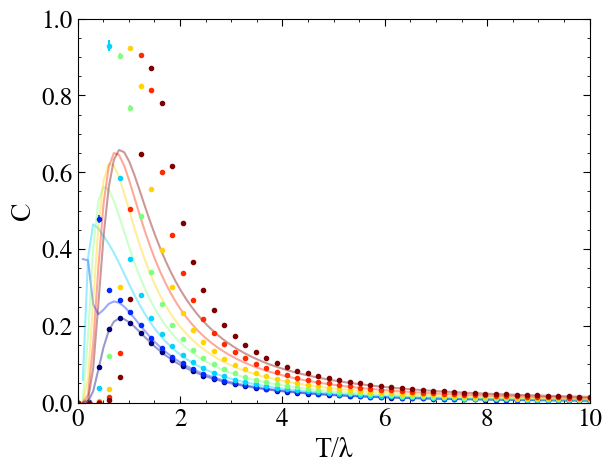

In [16]:
idx_D = 1:size(Tobs, 1)
idx_M = 1:length(T)

Xrange = [0,10]
Yrange = [0,1]
Tfit = range(Xrange[1], Xrange[2], length=100)


f = figure()
for i in eachindex(𝒽)
    plot(Tfit, Cfun(Tfit,𝒽[i]), color=colors[i], alpha=0.4)
    
    plotWithError(D_M[idx_M,i], T[idx_M], colors[i], ".", "Microcanonical" , DStd_M[idx_M,i])
    #plotWithError(D_D[idx_D,i], Tobs[idx_D,i], :darkorchid, ".", "Demons", 1/3 .* DStd_D[idx_D,i], TobsStd[idx_D,i])
end

xlim(Xrange)
ylim(Yrange)

xlabel("T/λ", fontname=font, fontsize=fontsize) # λξ
ylabel("C", fontname=font, fontsize=fontsize)

ax = gca()
ax.tick_params(which="both", length=5, top="on", right="on", direction="in")
ax.tick_params(which="major", length=5)
ax.tick_params(which="minor", length=2)
minorticks_on()

f.subplots_adjust(bottom=0.15, left=0.15, right=0.95, top=0.95)

#legend(frameon=false)

savefig("figs/" * Variable * ".pdf")

In [17]:
print(𝒽[3])

0.3333333333333333

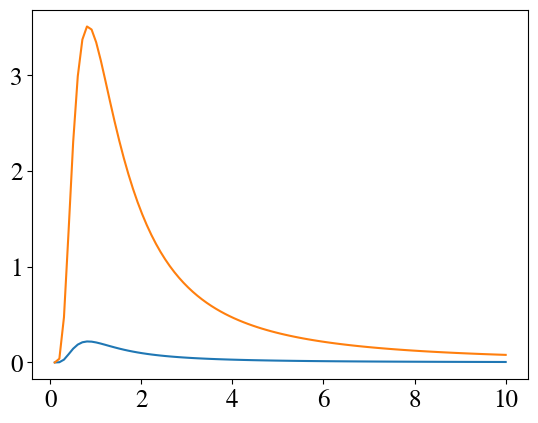

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000D11D0160>

In [18]:
plot(Tfit, HeatCapacity(Tfit, 0, z))
plot(Tfit, 2/z .* (8 ./ Tfit).^2 .* ExcitationDensity(Tfit, 0, z) .* (1 .- AllExcitationDensity(Tfit, 0, z)))

In [19]:
print(2 / log(prod(load(file, "Size"))))

0.6213349345596119

## Diffn in Field

In [20]:
Variable = "MSDExponent"

α = load(filefun("MicroDiff"), "alpha");
γ = load(filefun("MicroDiff"), "gamma");
T = load(filefun("MicroDiff"), "Temperature");

𝒽 = load(filefun("MicroDiff"), "Fields");
colors = jetmap(length(𝒽));

In [21]:
idx = 5:length(T)

5:50

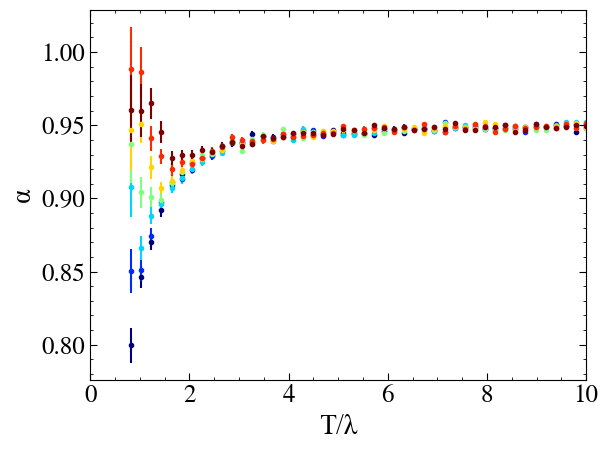

In [22]:
f = figure()
for i in eachindex(𝒽)
    plotWithError(α[1,idx,i], T[idx], colors[i], ".", "" , α[2,idx,i])
end

xlim([0,10])

ax = gca()
ax.tick_params(which="both", length=5, top="on", right="on", direction="in")
ax.tick_params(which="major", length=5)
ax.tick_params(which="minor", length=2)
minorticks_on()

xlabel("T/λ", fontname=font, fontsize=fontsize)
ylabel("α", fontname=font, fontsize=fontsize)

savefig("figs/alpha_field.pdf")

In [23]:
mean(α[1,:,:])

NaN

In [24]:
sqrt(mean(α[2,:,:].^2))

NaN

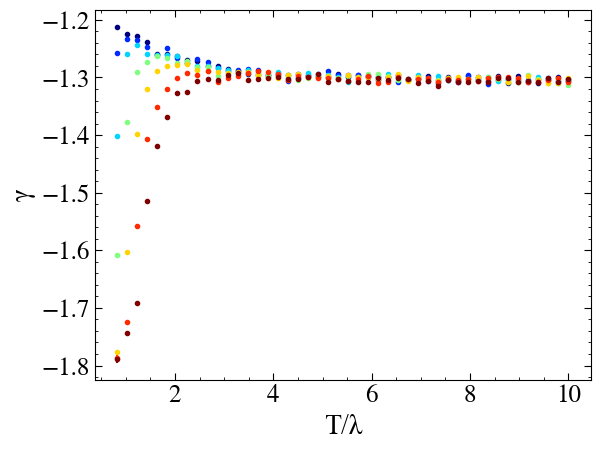

In [25]:
f = figure()
for i in eachindex(𝒽)
    plotWithError(γ[1,idx,i], T[idx], colors[i], ".", "" , γ[2,idx,i])
end

ax = gca()
ax.tick_params(which="both", length=5, top="on", right="on", direction="in")
ax.tick_params(which="major", length=5)
ax.tick_params(which="minor", length=2)
minorticks_on()

xlabel("T/λ", fontname=font, fontsize=fontsize)
ylabel("γ", fontname=font, fontsize=fontsize)

savefig("figs/gamma_field.pdf")

In [26]:
x = load(filefun("MicroDiff"), "trajectories");

Error encountered while load FileIO.File{FileIO.DataFormat{:JLD}, String}("C:\\Users\\conno\\Documents\\CAMBRIDGE\\Part III\\Comp Project\\JULIA/PROJECT/data/MicroDiff.jld").

Fatal error:


LoadError: HDF5.API.H5Error: Error opening object //trajectories
libhdf5 Stacktrace:
 [1] [0m[1mH5G__loc_find_cb[22m: Symbol table/Object not found
[90m     object 'trajectories' doesn't exist[39m
  ⋮
Stacktrace:
  [1] [0m[1mmacro expansion[22m
[90m    @ [39m[90mC:\Users\conno\.julia\packages\HDF5\HtnQZ\src\api\[39m[90m[4merror.jl:18[24m[39m[90m [inlined][39m
  [2] [0m[1mh5o_open[22m[0m[1m([22m[90mloc_id[39m::[0mInt64, [90mpathname[39m::[0mString, [90mlapl_id[39m::[0mInt64[0m[1m)[22m
[90m    @ [39m[35mHDF5.API[39m [90mC:\Users\conno\.julia\packages\HDF5\HtnQZ\src\api\[39m[90m[4mfunctions.jl:2548[24m[39m
  [3] [0m[1mgetindex[22m
[90m    @ [39m[90mC:\Users\conno\.julia\packages\JLD\S6t6A\src\[39m[90m[4mJLD.jl:297[24m[39m[90m [inlined][39m
  [4] [0m[1mread[22m[0m[1m([22m[90mparent[39m::[0mJLD.JldFile, [90mname[39m::[0mString[0m[1m)[22m
[90m    @ [39m[36mJLD[39m [90mC:\Users\conno\.julia\packages\JLD\S6t6A\src\[39m[90m[4mJLD.jl:360[24m[39m
  [5] [0m[1m#48[22m
[90m    @ [39m[90mC:\Users\conno\.julia\packages\JLD\S6t6A\src\[39m[90m[4mJLD.jl:1335[24m[39m[90m [inlined][39m
  [6] [0m[1mjldopen[22m[0m[1m([22m::[0mJLD.var"#48#49"[90m{String}[39m, ::[0mString, ::[0mVararg[90m{String}[39m; [90mkws[39m::[0mBase.Pairs[90m{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}[39m[0m[1m)[22m
[90m    @ [39m[36mJLD[39m [90mC:\Users\conno\.julia\packages\JLD\S6t6A\src\[39m[90m[4mJLD.jl:262[24m[39m
  [7] [0m[1mjldopen[22m
[90m    @ [39m[90mC:\Users\conno\.julia\packages\JLD\S6t6A\src\[39m[90m[4mJLD.jl:259[24m[39m[90m [inlined][39m
  [8] [0m[1mfileio_load[22m[0m[1m([22m[90mf[39m::[0mFileIO.File[90m{FileIO.DataFormat{:JLD}, String}[39m, [90mvarname[39m::[0mString[0m[1m)[22m
[90m    @ [39m[36mJLD[39m [90mC:\Users\conno\.julia\packages\JLD\S6t6A\src\[39m[90m[4mJLD.jl:1334[24m[39m
  [9] [0m[1m#invokelatest#2[22m
[90m    @ [39m[90m.\[39m[90m[4messentials.jl:729[24m[39m[90m [inlined][39m
 [10] [0m[1minvokelatest[22m
[90m    @ [39m[90m.\[39m[90m[4messentials.jl:726[24m[39m[90m [inlined][39m
 [11] [0m[1maction[22m[0m[1m([22m[90mcall[39m::[0mSymbol, [90mlibraries[39m::[0mVector[90m{Union{Base.PkgId, Module}}[39m, [90mfile[39m::[0mFileIO.Formatted, [90margs[39m::[0mString; [90moptions[39m::[0mBase.Pairs[90m{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}[39m[0m[1m)[22m
[90m    @ [39m[32mFileIO[39m [90mC:\Users\conno\.julia\packages\FileIO\aP78L\src\[39m[90m[4mloadsave.jl:219[24m[39m
 [12] [0m[1maction[22m
[90m    @ [39m[90mC:\Users\conno\.julia\packages\FileIO\aP78L\src\[39m[90m[4mloadsave.jl:196[24m[39m[90m [inlined][39m
 [13] [0m[1maction[22m[0m[1m([22m[90mcall[39m::[0mSymbol, [90mlibraries[39m::[0mVector[90m{Union{Base.PkgId, Module}}[39m, [90msym[39m::[0mSymbol, [90mfile[39m::[0mString, [90margs[39m::[0mString; [90moptions[39m::[0mBase.Pairs[90m{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}[39m[0m[1m)[22m
[90m    @ [39m[32mFileIO[39m [90mC:\Users\conno\.julia\packages\FileIO\aP78L\src\[39m[90m[4mloadsave.jl:185[24m[39m
 [14] [0m[1maction[22m
[90m    @ [39m[90mC:\Users\conno\.julia\packages\FileIO\aP78L\src\[39m[90m[4mloadsave.jl:185[24m[39m[90m [inlined][39m
 [15] [0m[1mload[22m[0m[1m([22m[90mfile[39m::[0mString, [90margs[39m::[0mString; [90moptions[39m::[0mBase.Pairs[90m{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}[39m[0m[1m)[22m
[90m    @ [39m[32mFileIO[39m [90mC:\Users\conno\.julia\packages\FileIO\aP78L\src\[39m[90m[4mloadsave.jl:113[24m[39m
 [16] [0m[1mload[22m[0m[1m([22m[90mfile[39m::[0mString, [90margs[39m::[0mString[0m[1m)[22m
[90m    @ [39m[32mFileIO[39m [90mC:\Users\conno\.julia\packages\FileIO\aP78L\src\[39m[90m[4mloadsave.jl:109[24m[39m
 [17] top-level scope
[90m    @ [39m[90m[4mIn[26]:1[24m[39m

In [27]:
f = figure()

figure()
for p in 1:size(x[1][1][end], 2)
    plot(x[1][1][end][1,p,:], x[1][1][end][2,p,:])
end

ax = gca()
ax.tick_params(which="both", length=5, top="on", right="on", direction="in")
ax.tick_params(which="major", length=5)
ax.tick_params(which="minor", length=2)
minorticks_on()

xlabel("T/λ", fontname=font, fontsize=fontsize)
ylabel("γ", fontname=font, fontsize=fontsize)

savefig("figs/gamma_field.pdf")

LoadError: UndefVarError: x not defined

## Diffn Comparison

In [28]:
tau = 1:100

1:100

In [29]:
Variable = "MSD"

MSD_sqrIce = load(filefun("TMP/MicroDiff_sqrIce"), "MSD");
MSD_sqrTrc = load(filefun("TMP/MicroDiff_sqrTrc"), "MSD");
MSD_hexIce = load(filefun("TMP/MicroDiff_hexIce"), "MSD");
MSD_hexTrc = load(filefun("TMP/MicroDiff_hexTrc"), "MSD");

In [30]:
msd_sqrIce = mean(MSD_sqrIce[:,:,1], dims=2);
msd_sqrTrc = mean(MSD_sqrTrc[:,:,1], dims=2);
msd_hexIce = mean(MSD_hexIce[:,:,1], dims=2);
msd_hexTrc = mean(MSD_hexTrc[:,:,1], dims=2);

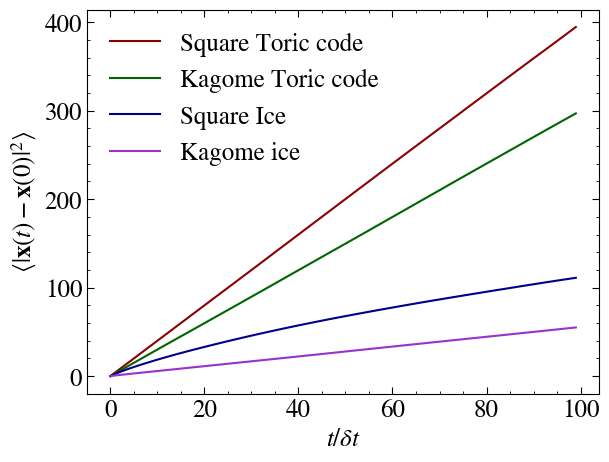

In [31]:
f = figure()
plot(msd_sqrTrc[tau], color=:darkred, label = "Square Toric code")
plot(msd_hexTrc[tau], color=:darkgreen, label = "Kagome Toric code")
plot(msd_sqrIce[tau], color=:darkblue, label = "Square Ice")
plot(msd_hexIce[tau], color=:darkorchid, label = "Kagome ice")

    
xlabel("\$t/\\delta t\$")
ylabel("\$\\langle|\\mathbf{x}(t)-\\mathbf{x}(0)|^2\\rangle\$")

ax = gca()
ax.tick_params(which="both", length=5, top="on", right="on", direction="in")
ax.tick_params(which="major", length=5)
ax.tick_params(which="minor", length=2)
minorticks_on()

legend(frameon=false)

f.subplots_adjust(bottom=0.15, left=0.15, right=0.95, top=0.95)

savefig("figs/" * Variable * ".pdf")

In [32]:
Variable = "VACF"

VACF_sqrIce = load(filefun("TMP/MicroDiff_sqrIce"), "VACF");
VACF_sqrTrc = load(filefun("TMP/MicroDiff_sqrTrc"), "VACF");
VACF_hexIce = load(filefun("TMP/MicroDiff_hexIce"), "VACF");
VACF_hexTrc = load(filefun("TMP/MicroDiff_hexTrc"), "VACF");

In [33]:
vacf_sqrIce = mean(VACF_sqrIce[:,:,1], dims=2);
vacf_sqrTrc = mean(VACF_sqrTrc[:,:,1], dims=2);
vacf_hexIce = mean(VACF_hexIce[:,:,1], dims=2);
vacf_hexTrc = mean(VACF_hexTrc[:,:,1], dims=2);

vacf_sqrIce[2:end] .*= sign(vacf_sqrIce[2]);
vacf_sqrTrc[2:end] .*= sign(vacf_sqrTrc[2]);
vacf_hexIce[2:end] .*= sign(vacf_hexIce[2]);
vacf_hexTrc[2:end] .*= sign(vacf_hexTrc[2]);

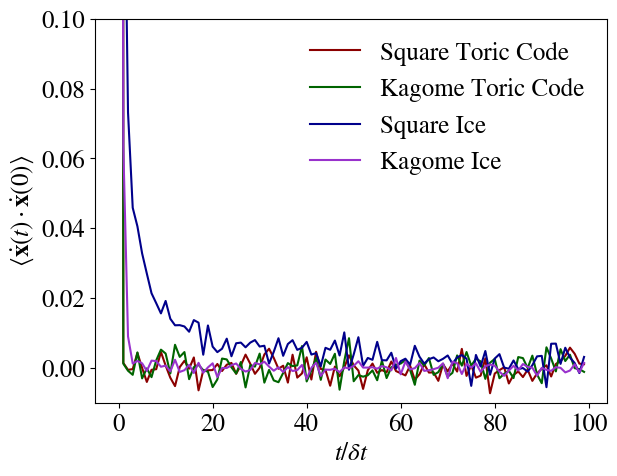

In [34]:
f = figure()
plot(vacf_sqrTrc[tau], color=:darkred, label = "Square Toric Code")
plot(vacf_hexTrc[tau], color=:darkgreen, label = "Kagome Toric Code")
plot(vacf_sqrIce[tau], color=:darkblue, label = "Square Ice")
plot(vacf_hexIce[tau], color=:darkorchid, label = "Kagome Ice")


ylim([-0.01,0.1])

xlabel("\$t/\\delta t\$")
ylabel("\$\\langle \\dot{\\mathbf{x}}(t) \\cdot \\dot{\\mathbf{x}}(0) \\rangle\$")

legend(frameon=false)

f.subplots_adjust(bottom=0.15, left=0.15, right=0.95, top=0.95)

savefig("figs/" * Variable * ".pdf")